<a href="https://colab.research.google.com/github/ivanLzc/ml-lab/blob/main/Linearna-Regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearna Regresija

Linearna regresija predstavlja model mašinskog učenja koji je pogodan za modelovanje linearnih odnosa medju promenjivama.
Ona predstavlja specijalan slučaj linearnog modela gde je broj nezavisnih promenjivih 1. Nezavisne promenjive su one na osnovu kojih treba dati predikciju vrednosti zavisne.

Kada je reč o linearnoj regresiji, cilj nam je da, sa što manjom greškom, predvidimo vrednost zavisne na osnovu vrednosti nezavisne promenjive.

Suštinski, model linearne regresije jeste linearna funkcija sledećeg oblika:

\begin{equation}
  y = α + βx
\end{equation}

Ova jednačina opisuje pravu sa koeficijentom pravca β i isečkom na y osi α.

Svaka tačka iz skupa podataka može biti prikazana kao
\begin{equation}
  y_i = α + βx_i + 𝜀_i
\end{equation}

gde $𝛆_i$ predstavlja grešku. $𝛆_i$ se takođe zove i **rezidual** i, kada je linearna regresija u pitanju, pretpostavlja se da ima normalnu raspodelu sa $\mu = 0$.

Cilj obučavanja ovog modela jeste da se nađu optimalne vrednosti parametara $α$ i $β$, takvi da, na izvestan način, minimizuju grešku.

Opšti oblik linearnog modela glasi
\begin{equation}
 y = β_nx_n + β_{n-1}x_{n-1} + ⋯ + β_2x_2 + β_1x_1 + β_0
\end{equation}

gde su {$x_n \cdots x_1$} nezavisne promenjive, a $y$ zavisna promenjiva. Skup {$\beta_0 \cdots \beta_n$} predstavlja parametre modela.

### Generisanje sintetičkog skupa podataka

Kako bismo ilustrovali moć linearne regresije, bolje je da sintetišemo skup podataka koji je ima sve osobine koje su potrebne za primenu linearne regresije

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Pretpostavljamo da prava koja optimalno opisuje podatke jeste $y = 2.5x + 4$. Greška $𝛆$ predstavlja varijansu u promenjivoj $y$ koja se ne može objasniti promenjivom $x$.

In [ ]:
# pretpostavimo linearnu zavisnost izmedju promenjivih
k = 2.5
n = 4
x = np.random.uniform(0, 50, size=1000)
eps = np.random.normal(scale=10, size=1000)
y_hat = k * x + n
y = k * x + n + eps


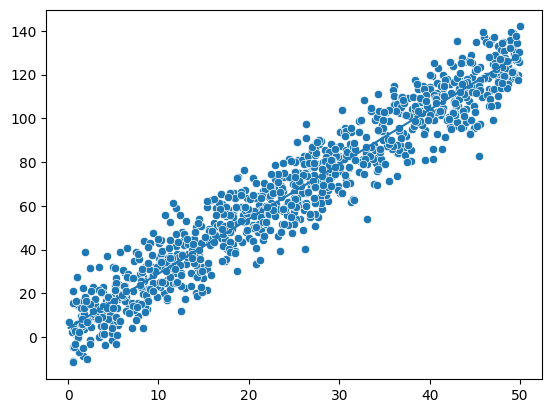

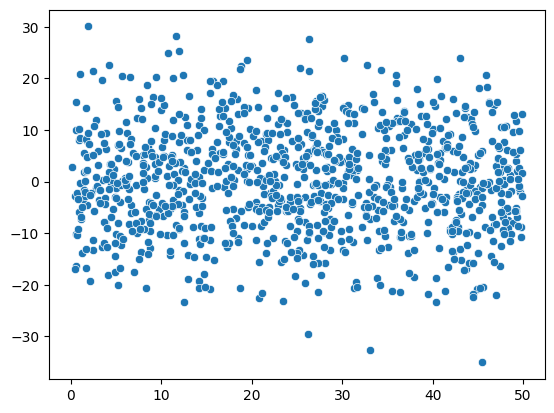

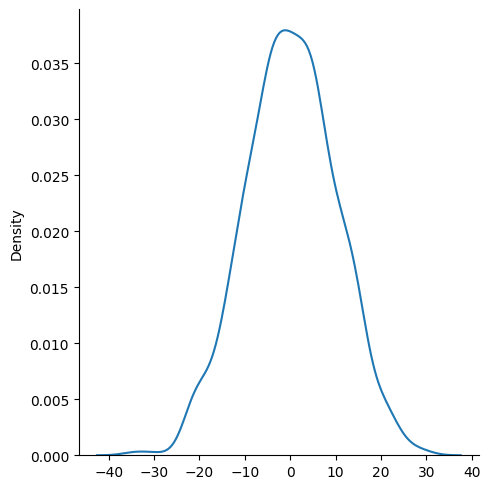

In [ ]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y_hat)
plt.show()
ax = sns.scatterplot(x=x, y=eps, )
plt.show()
sns.displot(eps,kind="kde")

Prvi grafik prikazuje stvarne podatke, i liniju koja najbolje opisuje podatke.
Drugi grafik predstavlja vrednost $𝛆_i$ za svako $x_i$. Treci grafik predstavlja raspodelu reziduala.

#### Zavisnost sume kvadrata reziduala od koeficijenta pravca $k$

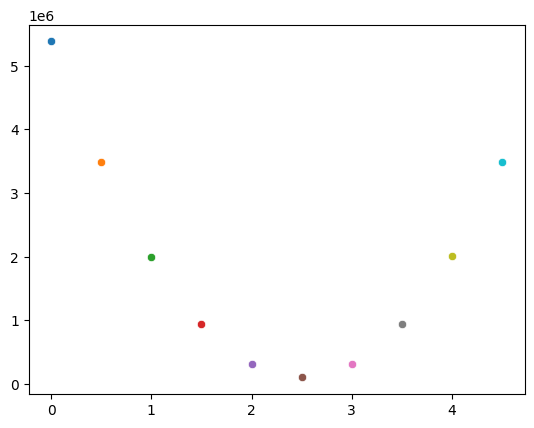

In [ ]:
ks = [x / 2.0 for x in range(0, 10)]
n = 4

for k in ks:
    y_hat = k * x + n
    residuals = (y - y_hat)**2
    rss = residuals.sum()
    sns.scatterplot(x=k, y=[rss])


#### Zavisnost sume kvadrata reziduala od parametra $n$

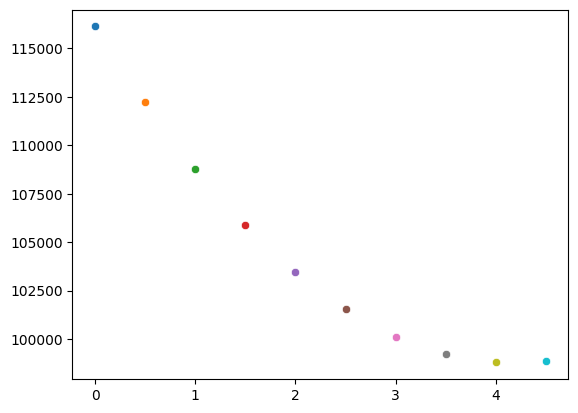

In [ ]:
plt.show()

ns = [x / 2.0 for x in range(0, 10)]
k = 2.5

for n in ns:
    y_hat = k * x + n
    residuals = (y - y_hat)**2
    rss = residuals.sum()
    sns.scatterplot(x=n, y=[rss])

Sa prethodnih grafika se vidi da vrednosti $k = 2.5$ i $n = 4$ predstavljaju najbolje parametre modela, tj. za te parametre, optimizacioni kriterijum ima minimalne vrednosti.

\usepackage{amsmath}
## Određivanje optimalnih parametara modela

S obzirom da imamo samo dva parametra od kojih direktno zavisi suma kvadrata reziduala, možemo analitički izračunati optimalne parametre $α$ i $β$.

Suma kvadrata reziduala se može prikazati kao
\begin{equation}
RSS = ∑_i(y_i- \hat{y_i})^2 = ∑_i(y_i - (α + βx_i))^2
\end{equation}

Podsetimo se izvoda slozene funkcije:
\begin{equation}
\frac{d}{dx}f(g(x)) = f'(g(x))g'(x)
\end{equation}

Ukoliko trazimo parcijalni izvod po $α$:
\begin{align}
  \frac{\partial}{\partial \alpha} ∑(y_i - (α + βx_i))^2 & = ∑ \frac{\partial}{\partial \alpha} (y_i - (α + βx_i))^2 \\
  & = ∑ 2(y_i - (α + βx_i))(-1) \\
  & = -2∑(y_i - (α + βx_i))
\end{align}

A kada trazimo parcijalni izvod po $\beta$:
\begin{align}
  \frac{\partial}{\partial \beta} ∑(y_i - (α + βx_i))^2 & = ∑ \frac{\partial}{\partial \beta} (y_i - (α + βx_i))^2 \\
  & = ∑ 2(y_i - (α + βx_i))(-x_i) \\
  & = -2∑x_i(y_i - (α + βx_i))
\end{align}

Zelimo da znamo za koje vrednosti $\alpha$ i $\beta$ funkcija RSS ima minimalnu vrednost. Minimalna vrednost sume iskljucivo pozitivnih vrednosti je 0. Intuitivno, RSS vrednost ne bi trebala da ima lokalne maksimume. Stoga, ako nadjemo vrednosti $\alpha$ i $\beta$ takve da su parcijalni izvodi 0, mora da smo nasli minimum.

Znaci resavamo za $\alpha$ i $\beta$ sistem
\begin{align*}
  -2∑(yi-(α+βxi)) & = 0 \\
  -2∑xi(yi-(α+βxi)) & = 0 \\
  \hline
  ∑(yi-(α+βxi)) & = 0 \\
  ∑xi(yi-(α+βxi)) & = 0 \\
\end{align*}


## Praktični primer

Import neophodnih biblioteka


*   **pandas** za ucitavanje i obradu tabelarnih podataka
*   **seaborn** za crtanje grafika
*   **pyplot** za finiju kontrolu nad graficima



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Ucitavanje skupa podataka

<Axes: >

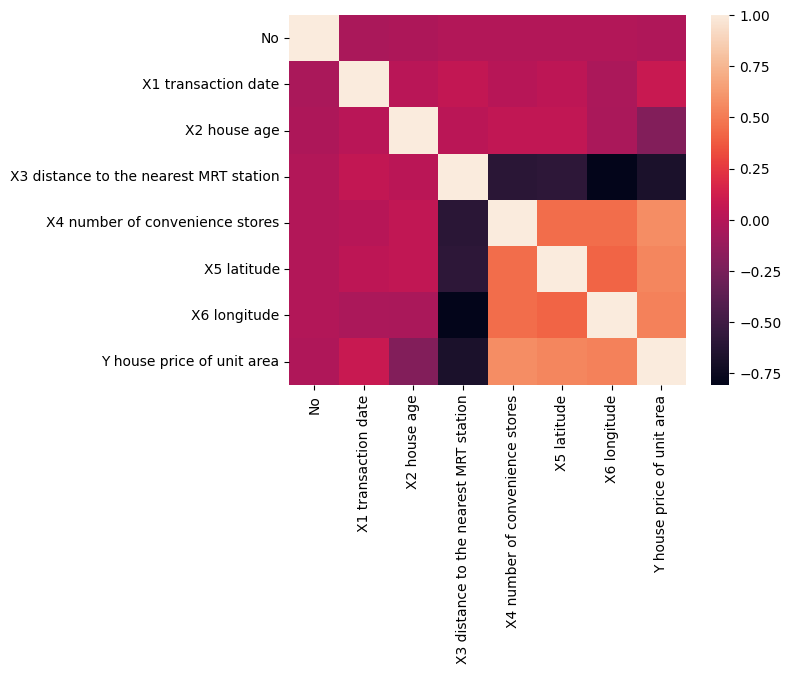

In [22]:
data = pd.read_csv("Real estate.csv")
data.head()
cor = data.corr()
sns.heatmap(cor)
#data.corr nam prikazuje koliko su korelisani neki podaci

## Eksploratorna analiza podataka

Ovaj korak je potreban kako bismo bolje razumeli strukturu podataka i eventualno otklonili nedostatke.
Dobra eksploratorna analiza podrazumeva:


1.   Razumevanje domena problema
2.   Razumevanje tehnika vizuelizacije



### Vizuelizacija

Prirodu podataka je najlakse uvideti koriscenjem grafika. Dobro osmisljeni grafici mogu pomoci da se utvrde trendovi i zavisnosti koje nije lako uociti jednostavnim tabelarnim pregledom

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Cena usluga u zavisnosti od godina, bmi i broja dece

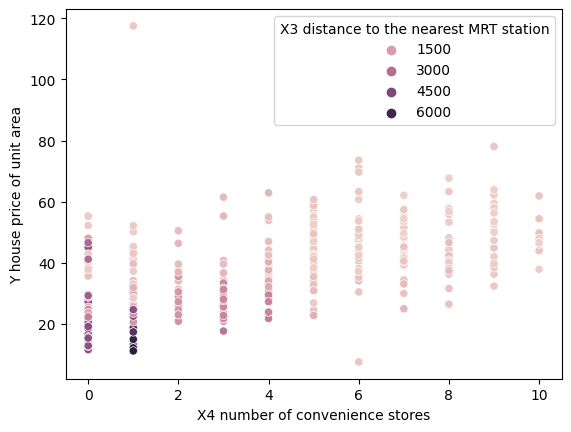

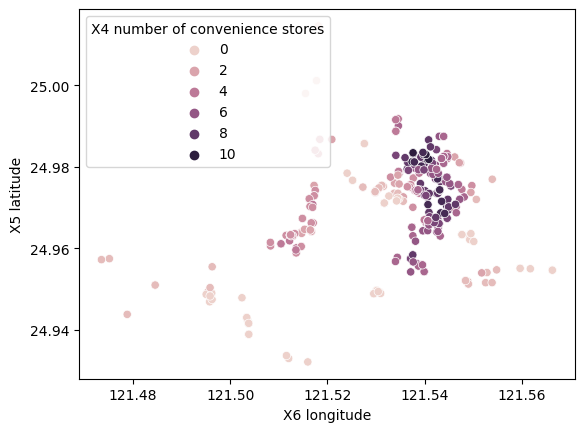

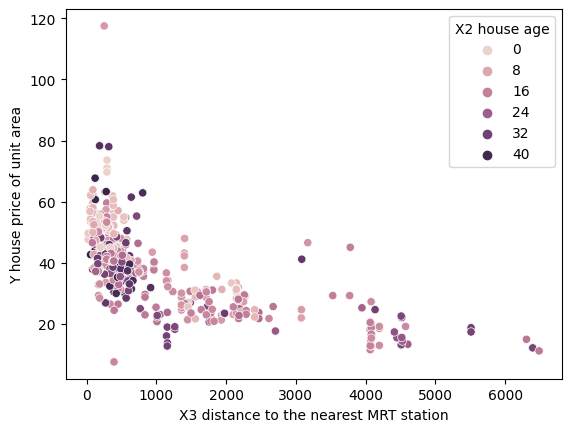

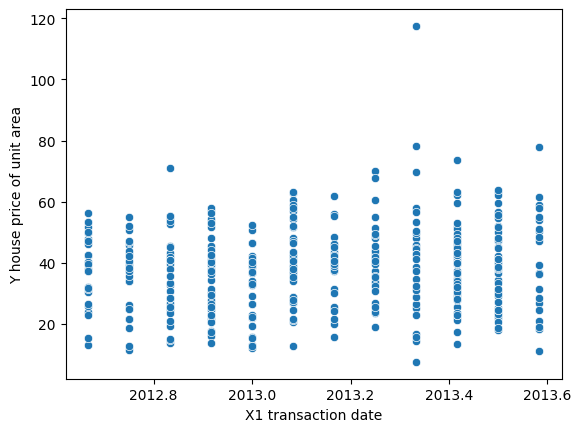

In [26]:
sns.scatterplot(data, x=data['X4 number of convenience stores'], y=data['Y house price of unit area'], hue=data['X3 distance to the nearest MRT station'])
plt.show()
#ovaj grafik prikazuje zavisnosti cene kuce od broja prodavnica. sto ima vise prodavnica cena je malo veca. Sto se tice MRT stanica, one su blize kad ima vise prodavnica i kad je cena veca.
#Donji levi ugao ovog grafika je verovatno van grada.
sns.scatterplot(data, x=data['X6 longitude'], y=data['X5 latitude'], hue=data['X4 number of convenience stores'])
plt.show()
#ovaj grafik prikazuje mapu nekog dela Zemlje. Broj prodavnica je veci u jednom delu, taj deo je vise naseljen i to je grad na Tajvanu.
sns.scatterplot(data, x=data['X3 distance to the nearest MRT station'], y=data['Y house price of unit area'], hue=data['X2 house age'])
plt.show()
#ovaj grafik prikazuje obrnutu zavisnost cene kuce od MRT stanica. Starost kuce je veca kad je bliza stanici.
sns.scatterplot(data, x=data['X1 transaction date'], y=data['Y house price of unit area'])
plt.show()
#ljudi kupuju kuce cije cene nisu velike, zato sto vecina datuma transakcije je manja za kucu koja vredi ispod 60.

#### Tumačenje grafika

Jasno se vidi da nepušači imaju niže cene osiguranja nego pušači. Te tvrdjne možemo dokazati i statistički tako što ćemo videti kakva je raspodela cena kod pušača i nepušača.

In [ ]:
pusaci = data.loc[data['smoker'] == 'yes']
nepusaci = data.loc[data['smoker'] == 'no']
print(pusaci.charges.mean(), pusaci.charges.std())
print(nepusaci.charges.mean(), nepusaci.charges.std())

32050.23183153284 11541.547175589121
8434.268297856204 5993.7818191949345


Iste tvrdnje se mogu zaključiti i sa sledećih grafika

<Axes: xlabel='smoker', ylabel='charges'>

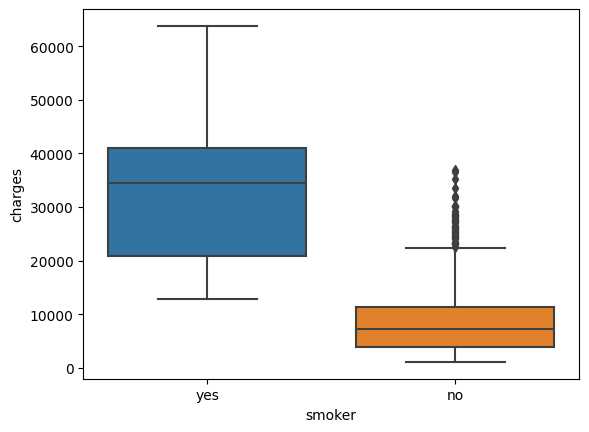

In [ ]:
sns.boxplot(data, x='smoker', y='charges')

#### Cena usluge u zavisnosti od regiona

Nije potrebno domensko znanje da bismo znali da razliciti regioni velikih država poput SAD imaju različite životne standarde. Stoga ima smisla porediti raspodele cena u odnosu na regione.

<Axes: xlabel='region', ylabel='charges'>

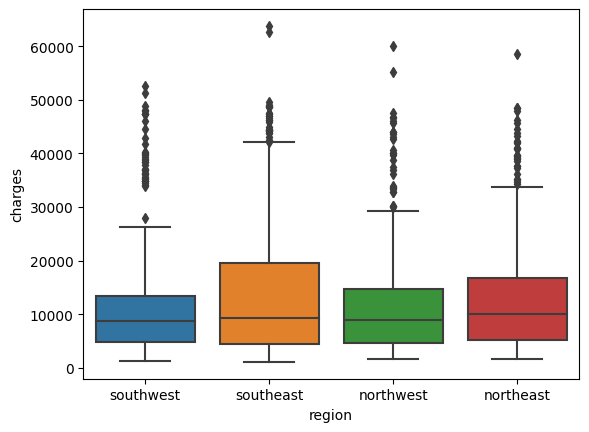

In [ ]:
sns.boxplot(data, x='region', y='charges')

#### Tumačenje grafika

Na osnovu grafika se ne može na prvi pogled zaključiti da postoji značajna razlika u ceni.

<ipython-input-27-04c2686bb54b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

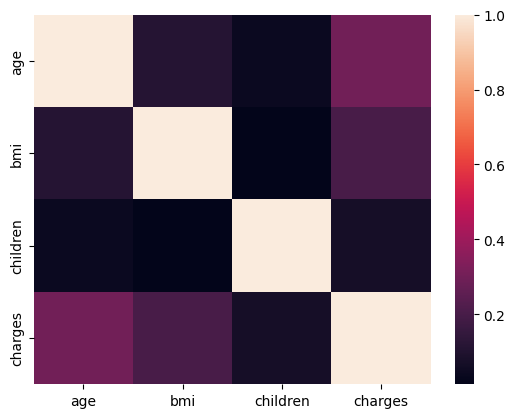

In [ ]:
cor = data.corr()
sns.heatmap(cor)

## Trening test split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

print(len(train))
print(len(test))

219
55


## Definicija linearnog modela i treniranje

In [ ]:
from sklearn.linear_model import LinearRegression
# definicija modela
model = LinearRegression()
# treniranje (fitovanje) modela
model.fit(train[['age', 'bmi', 'children']], train['charges'])



LinearRegression()

## Testiranje modela

In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_true = test['charges']
y_pred = model.predict(test[['age','bmi', 'children']])

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)


6606.006779748288


In [ ]:
!git commit -m "Dodatna objasnjenja"

fatal: not a git repository (or any of the parent directories): .git
